# Análisis de datos
# *Notebook de salarios de cargos públicos en Guanajuato*
## Ana Isabel Moreno Hernández
### NUA: 434232

- Importamos librerías.

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

- Datos 

In [3]:
tabulador = pd.read_excel('tabulador_pe2019.xls', header = 9)

In [4]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


### **Apartado 1.** 
- ¿Cuál es el promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [7]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].mean()

56245.526717310335

In [8]:
tabulador.describe()['SUELDO MENSUAL NETO'].mean()

39499.1310069769

### **Apartado 2**
- Moda de las contribuciones del sueldo de un trabajador. Rango interquartil de la distribución.

In [9]:
media = {'Sueldo mensual neto':tabulador['SUELDO MENSUAL NETO'].mean(), 
         'Sueldo mensual bruto':tabulador['SUELDO MENSUAL BRUTO'].mean()}

moda  = {'Sueldo mensual neto':tabulador['SUELDO MENSUAL NETO'].mode(), 
         'Sueldo mensual bruto':tabulador['SUELDO MENSUAL BRUTO'].mode()}

percent25 = {'Sueldo mensual neto':tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%'], 
         'Sueldo mensual bruto':tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%']}

percent50 = {'Sueldo mensual neto':tabulador.describe()['SUELDO MENSUAL NETO'].loc['50%'], 
         'Sueldo mensual bruto':tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['50%']}

percent75 = {'Sueldo mensual neto':tabulador.describe()['SUELDO MENSUAL NETO'].loc['75%'], 
         'Sueldo mensual bruto':tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['75%']}

In [10]:
datos = pd.DataFrame({'Media': media,
                     'Moda': moda,
                     '25%': percent25,
                     '50%': percent50,
                     '75%': percent75})
datos

,Media,Moda,25%,50%,75%
Sueldo mensual neto,35829.353574,0 8294.835952 1 9609.786902 dtype: float64,10289.592141,22078.225282,50363.213596
Sueldo mensual bruto,49467.375935,0 9783.850296 1 11440.563407 dtype: flo...,12353.567028,28148.204516,70240.817524


### **Apartado 3**
- ¿Cuál es la dispersión de sueldos?

In [26]:
plt.style.use('fivethirtyeight')

Realizamos un histograma con los sueldos mensuales brutos. 

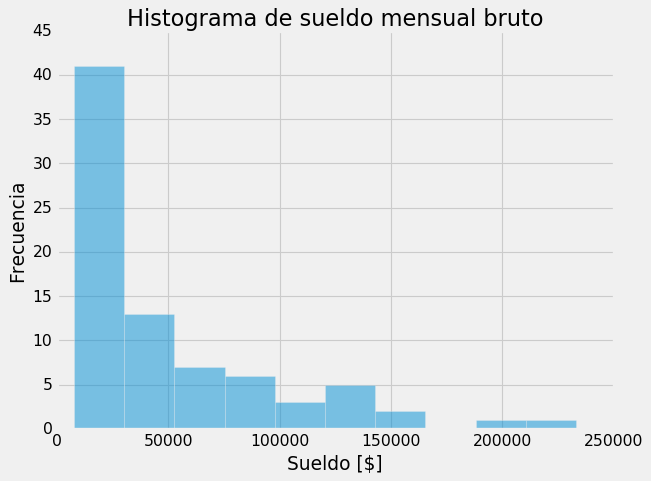

In [27]:
plt.hist(tabulador['SUELDO MENSUAL BRUTO'], alpha = 0.5);
plt.xlabel('Sueldo [$]')
plt.ylabel('Frecuencia')
plt.title('Histograma de sueldo mensual bruto');
plt.savefig('histograma1.png')

Realizamos un histograma con los sueldos mensuales netos.

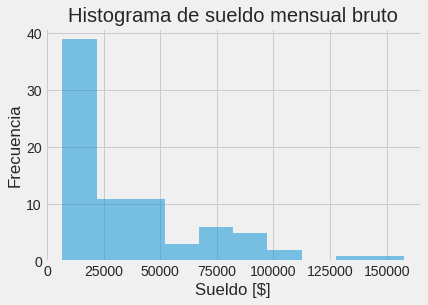

In [22]:
plt.hist(tabulador['SUELDO MENSUAL NETO'], alpha = 0.5);
plt.xlabel('Sueldo [$]')
plt.ylabel('Frecuencia')
plt.title('Histograma de sueldo mensual bruto');
plt.savefig('histograma2.png')

In [28]:
mediana = tabulador['SUELDO MENSUAL NETO'].median()
quarto = tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%']
trescuarto = tabulador.describe()['SUELDO MENSUAL NETO'].loc['75%']
maximo = tabulador['SUELDO MENSUAL NETO'].max()

Hacemos un histograma con la división de sueldos de 0 a 25%, 25% a 50%, 50% a 75% y 75% a 100%, y observamos el rango de salario de cada 25% de la población.

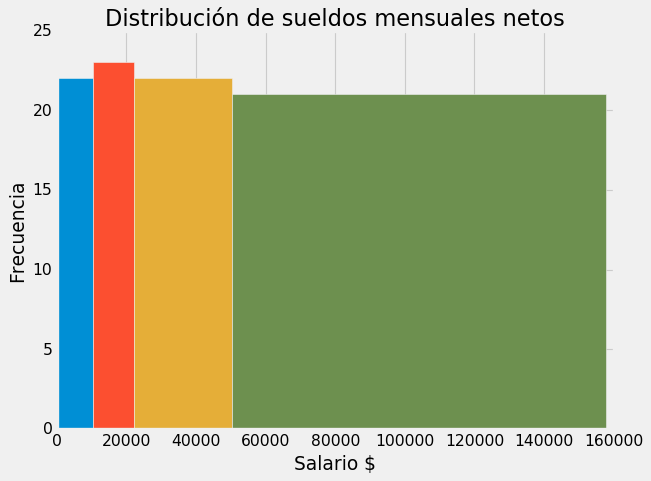

In [29]:
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[0, quarto]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[quarto, mediana]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[mediana, trescuarto]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[trescuarto, maximo]);

plt.title('Distribución de sueldos mensuales netos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')
plt.savefig("sueldos_netos.png", bbox_inches='tight')

Para sueldo mensual bruto:

In [30]:
mediana2 = tabulador['SUELDO MENSUAL BRUTO'].median()
quarto2 = tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%']
trescuarto2 = tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['75%']
maximo2 = tabulador['SUELDO MENSUAL BRUTO'].max()

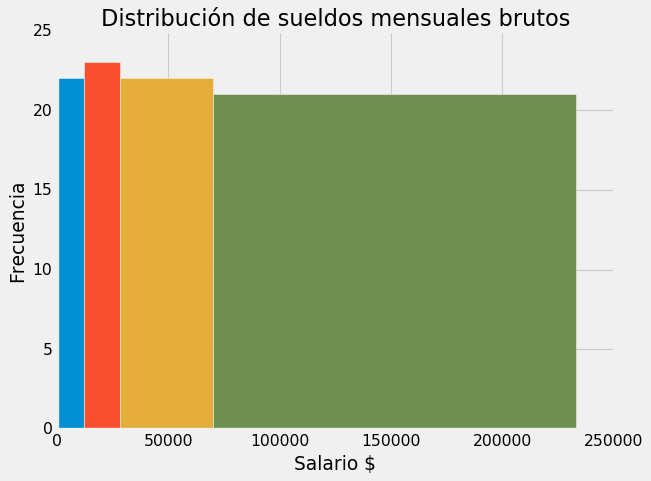

In [31]:
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[0, quarto2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[quarto2, mediana2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[mediana2, trescuarto2]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[trescuarto2, maximo2]);

plt.title('Distribución de sueldos mensuales brutos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')
plt.savefig("sueldos_brutos.png", bbox_inches='tight')

Ahora distribuimos utilizando la mediana y los percentiles 16 y 68.

Primero, para el sueldo mensual neto:

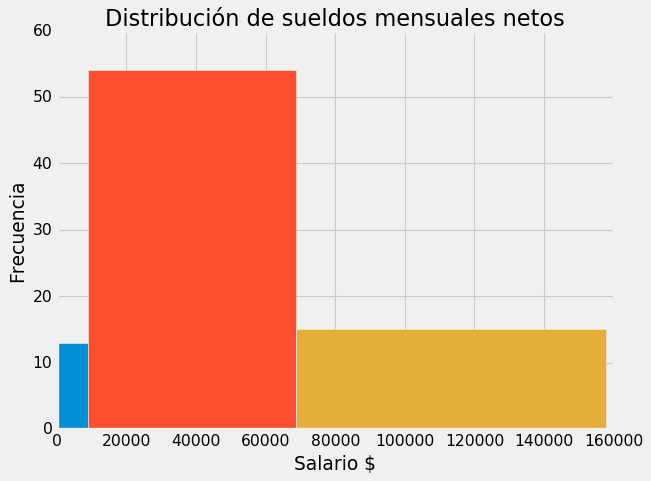

In [33]:
massigma = tabulador['SUELDO MENSUAL NETO'].quantile(0.84)
menossigma = tabulador['SUELDO MENSUAL NETO'].quantile(0.16)
cien = tabulador['SUELDO MENSUAL NETO'].quantile(1)

plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[0, menossigma]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[menossigma, massigma]);
plt.hist(tabulador['SUELDO MENSUAL NETO'],bins = 1,range=[massigma, cien]);

plt.title('Distribución de sueldos mensuales netos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')
plt.savefig("sueldos_netos2.png", bbox_inches='tight')

Ahora para los sueldos mensuales brutos:

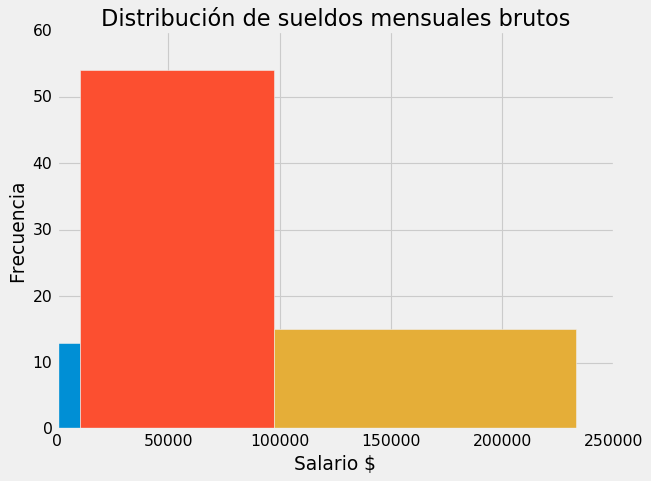

In [34]:
massigma = tabulador['SUELDO MENSUAL BRUTO'].quantile(0.84)
menossigma = tabulador['SUELDO MENSUAL BRUTO'].quantile(0.16)
cien = tabulador['SUELDO MENSUAL BRUTO'].quantile(1)

plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[0, menossigma]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[menossigma, massigma]);
plt.hist(tabulador['SUELDO MENSUAL BRUTO'],bins = 1,range=[massigma, cien]);

plt.title('Distribución de sueldos mensuales brutos')
plt.xlabel('Salario $')
plt.ylabel('Frecuencia')
plt.savefig("sueldos_brutos2.png", bbox_inches='tight')

### **Apartado 4**
- ¿Cuál es el salario base máximo?

In [35]:
tabulador.describe()['SUELDO BASE'].max()

59804.3279302758

In [41]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


### **Apartado 5**
- ¿Cuál es el sueldo base mínimo?

In [43]:
tabulador['SUELDO BASE'].min()

3080.4

In [44]:
tabulador.tail()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
74,1,NaN,OPERADOR/A ADMINISTRATIVO/A C,3374.277535,657.984119,1913.1,450,2364.753825,34.39,8794.505479,639.354852,556.755793,101.228326,7497.166508,10 Días por Año,45 Días por Año
75,1,A,OPERADOR/A ADMINISTRATIVO/A D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
76,1,A,OPERADOR/A DE SERVICIOS D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
77,1,A,OPERADOR/A COMERCIAL D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
78,1,A,OPERADOR/A TECNICO/A D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año


### **Apartado 6**
- Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos.

Obtenemos el porcentaje relativo en cada columna.

In [46]:
tabulador['% SUELDO BASE'] = 1 - (tabulador['SUELDO MENSUAL NETO']-tabulador['SUELDO BASE'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% CUOTAS SEGURIDAD SOCIAL'] = 1- (tabulador['SUELDO MENSUAL NETO']-tabulador['CUOTAS SEGURIDAD SOCIAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% PREVISIÓN SOCIAL'] = 1- (tabulador['SUELDO MENSUAL NETO']-tabulador['PREVISIÓN SOCIAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% AYUDA X SERVICIOS'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['AYUDA X SERVICIOS'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% APOYO FAMILIAR'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['APOYO FAMILIAR'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% IMPTO MENSUAL'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['IMPTO MENSUAL'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% ISSEG'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['ISSEG'])/tabulador['SUELDO MENSUAL NETO']
tabulador['% ISSSTE'] = 1-(tabulador['SUELDO MENSUAL NETO']-tabulador['ISSSTE'])/tabulador['SUELDO MENSUAL NETO']

In [47]:
tabla = tabulador.iloc[:,16:24]
tabla['PUESTO'] = tabulador['PUESTO'] 
tabla

,% SUELDO BASE,% CUOTAS SEGURIDAD SOCIAL,% PREVISIÓN SOCIAL,% AYUDA X SERVICIOS,% APOYO FAMILIAR,% IMPTO MENSUAL,% ISSEG,% ISSSTE,PUESTO
0,0.379231,0.037052,0.012131,0.164218,0.407706,0.441248,0.032230,0.004822,GOBERNADOR/A DEL ESTADO
1,0.368785,0.043953,0.014391,0.171379,0.367528,0.427483,0.038233,0.005720,SECRETARIO/A DE ESTADO A
2,0.376605,0.054086,0.017708,0.174066,0.383193,0.407273,0.047047,0.007039,DIRECTOR/A GENERAL PARAESTATAL A
3,0.376605,0.054086,0.017708,0.174066,0.383193,0.407273,0.047047,0.007039,SECRETARIO/A DE ESTADO B
4,0.384889,0.060645,0.019856,0.173909,0.372855,0.394190,0.052753,0.007892,SECRETARIO/A DE ESTADO C
...,...,...,...,...,...,...,...,...,...
74,0.450074,0.087764,0.255176,0.060023,0.315420,0.085280,0.074262,0.013502,OPERADOR/A ADMINISTRATIVO/A C
75,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687,OPERADOR/A ADMINISTRATIVO/A D
76,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687,OPERADOR/A DE SERVICIOS D
77,0.456224,0.088964,0.283341,0.066647,0.232871,0.039083,0.075277,0.013687,OPERADOR/A COMERCIAL D


In [85]:
valores = tabulador.mean()
porcentajes = pd.DataFrame({'Cantidad': valores})
sueldo_neto = porcentajes['Cantidad']['SUELDO MENSUAL NETO']

porcentajes['Porcentaje relativo al sueldo mensual neto'] = 1 - (sueldo_neto - porcentajes['Cantidad'])/sueldo
porcentajes = porcentajes.drop("SUELDO MENSUAL BRUTO", axis=0)
tabla1 = porcentajes[1:11]
tabla1

,Cantidad,Porcentaje relativo al sueldo mensual neto
SUELDO BASE,14427.528244,0.402673
CUOTAS SEGURIDAD SOCIAL,2551.057005,0.071200
PREVISIÓN SOCIAL,1913.100000,0.053395
AYUDA X SERVICIOS,4224.316456,0.117901
APOYO FAMILIAR,13095.416510,0.365494
GRATIFICACIÓN QUINCENAL,13255.957722,0.369975
IMPTO MENSUAL,11086.965356,0.309438
ISSEG,2178.762464,0.060809
ISSSTE,372.294541,0.010391
SUELDO MENSUAL NETO,35829.353574,1.000000


In [86]:
tabla1.to_csv(r'/home/anita/Documents/Otros/tabla1.csv')

In [61]:
porcentajes

,Cantidad
NIVEL,8.670886
SUELDO BASE,14427.528244
CUOTAS SEGURIDAD SOCIAL,2551.057005
PREVISIÓN SOCIAL,1913.100000
AYUDA X SERVICIOS,4224.316456
APOYO FAMILIAR,13095.416510
GRATIFICACIÓN QUINCENAL,13255.957722
SUELDO MENSUAL BRUTO,49467.375935
IMPTO MENSUAL,11086.965356
ISSEG,2178.762464


### **Apartado 7**
- ¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?

In [87]:
tabulador['Diferencia'] = tabulador['SUELDO MENSUAL NETO'][0] - tabulador['SUELDO MENSUAL NETO']

In [88]:
tabla3 = tabulador[['PUESTO', 'SUELDO MENSUAL NETO', 'Diferencia']]
tabla3

,PUESTO,SUELDO MENSUAL NETO,Diferencia
0,GOBERNADOR/A DEL ESTADO,157698.934369,0.000000
1,SECRETARIO/A DE ESTADO A,132939.199042,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,108033.486450,49665.447919
3,SECRETARIO/A DE ESTADO B,108033.486450,49665.447919
4,SECRETARIO/A DE ESTADO C,96349.090645,61349.843724
...,...,...,...
74,OPERADOR/A ADMINISTRATIVO/A C,7497.166508,150201.767861
75,OPERADOR/A ADMINISTRATIVO/A D,6751.946368,150946.988001
76,OPERADOR/A DE SERVICIOS D,6751.946368,150946.988001
77,OPERADOR/A COMERCIAL D,6751.946368,150946.988001


### **Apartado 8**
- ¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno?

In [105]:
suma = tabulador['CUOTAS SEGURIDAD SOCIAL']+tabulador['PREVISIÓN SOCIAL'] + tabulador['AYUDA X SERVICIOS'] + tabulador['GRATIFICACIÓN QUINCENAL'] + tabulador['APOYO FAMILIAR']

valores = pd.DataFrame({'Puesto': tabulador['PUESTO'],
                                'Apoyo total': suma})
apoyo_total = valores['Apoyo total'].sum()
valores['Porcentaje relativo de apoyo total'] = valores['Apoyo total']/apoyo_total
#valores['Porcentaje relativo de apoyo total'].sum()
valores

,Puesto,Apoyo total,Porcentaje relativo de apoyo total
0,GOBERNADOR/A DEL ESTADO,173321.997780,0.062613
1,SECRETARIO/A DE ESTADO A,146585.629699,0.052954
2,DIRECTOR/A GENERAL PARAESTATAL A,117189.695456,0.042335
3,SECRETARIO/A DE ESTADO B,117189.695456,0.042335
4,SECRETARIO/A DE ESTADO C,103088.308404,0.037241
...,...,...,...
74,OPERADOR/A ADMINISTRATIVO/A C,5420.227944,0.001958
75,OPERADOR/A ADMINISTRATIVO/A D,4536.108000,0.001639
76,OPERADOR/A DE SERVICIOS D,4536.108000,0.001639
77,OPERADOR/A COMERCIAL D,4536.108000,0.001639


In [102]:
apoyo_total

2768147.9676175583

### **Apartado 9**
- ¿Cuánto dinero es gastado en el ISSSTE entre todos los puestos?

In [92]:
tabla4 = tabulador.iloc[:,21:24]
tabla4['PUESTO'] = tabulador['PUESTO']
tabla4

,% IMPTO MENSUAL,% ISSEG,% ISSSTE,PUESTO
0,0.441248,0.032230,0.004822,GOBERNADOR/A DEL ESTADO
1,0.427483,0.038233,0.005720,SECRETARIO/A DE ESTADO A
2,0.407273,0.047047,0.007039,DIRECTOR/A GENERAL PARAESTATAL A
3,0.407273,0.047047,0.007039,SECRETARIO/A DE ESTADO B
4,0.394190,0.052753,0.007892,SECRETARIO/A DE ESTADO C
...,...,...,...,...
74,0.085280,0.074262,0.013502,OPERADOR/A ADMINISTRATIVO/A C
75,0.039083,0.075277,0.013687,OPERADOR/A ADMINISTRATIVO/A D
76,0.039083,0.075277,0.013687,OPERADOR/A DE SERVICIOS D
77,0.039083,0.075277,0.013687,OPERADOR/A COMERCIAL D


Y la cantidad de dinero que se da al ISSSTE entre todos los puestos es:

In [91]:
tabulador['ISSSTE'].sum()

29411.26871446277